In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR

In [140]:
Dtrain = pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Doctrain.xlsx')
Dtest=pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Doctest.xlsx')

In [141]:
Dtrain.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [142]:
Dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [143]:
Dtrain.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [144]:
Dtrain.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

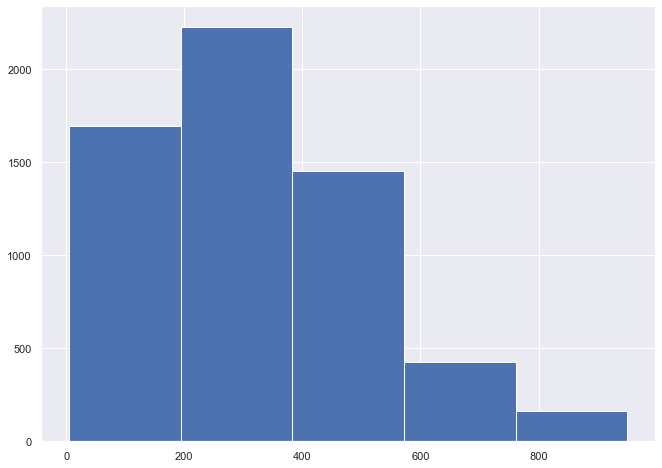

In [145]:
Dtrain['Fees'].hist(bins=5)

In [146]:
Dtrain["Experience"] = Dtrain["Experience"].str.split()
Dtrain["Experience"] = Dtrain["Experience"].str[0].astype("int")

In [147]:
Dtrain.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [148]:
Dtrain.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [149]:
Dtrain['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [150]:
Dtrain['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [151]:
Dtest['Experience'] = Dtest['Experience'].str[0:-17].astype(int)

In [152]:
Dtrain['Rating'] = Dtrain['Rating'].str[0:-1].astype(float)
Dtest['Rating'] = Dtest['Rating'].str[0:-1].astype(float)

In [153]:
Dtrain['Place'].fillna('none, none', inplace=True)
Dtest['Place'].fillna('none, none', inplace=True)

In [154]:
Dtrain['Locality'] = Dtrain['Place'].str.rsplit(',', 1).str.get(0)
Dtrain['City'] = Dtrain['Place'].str.rsplit(',', 1).str.get(1)
Dtest['Locality'] = Dtest['Place'].str.rsplit(',', 1).str.get(0)
Dtest['City']= Dtest['Place'].str.split(',', 1).str.get(1)

In [155]:
Dtrain['City'] = Dtrain['City'].str.strip()
Dtest['City'] = Dtest['City'].str.strip()

In [156]:
Dtrain.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


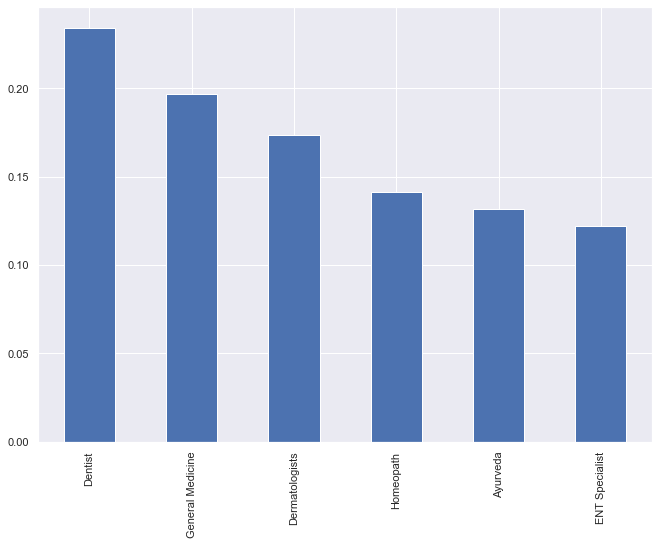

In [157]:

Dtrain['Profile'].value_counts(normalize=True).plot(kind='bar')

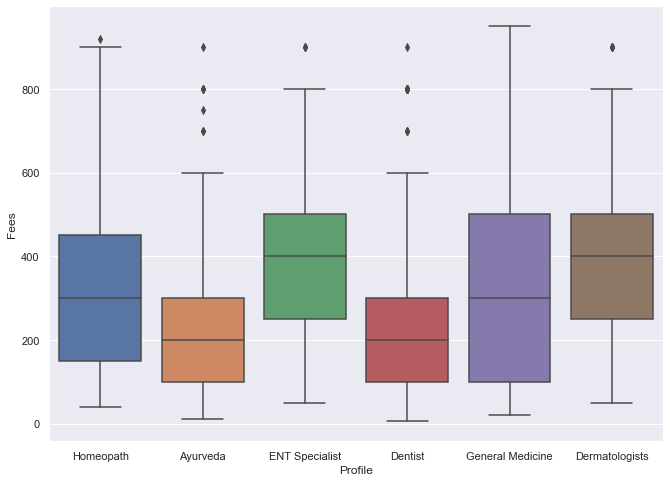

In [158]:
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x="Profile", y="Fees", data=Dtrain)

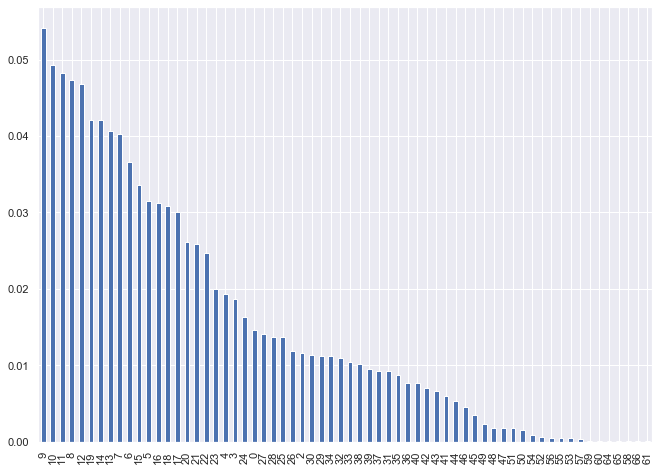

In [159]:
Dtrain['Experience'].value_counts(normalize=True).plot(kind='bar')


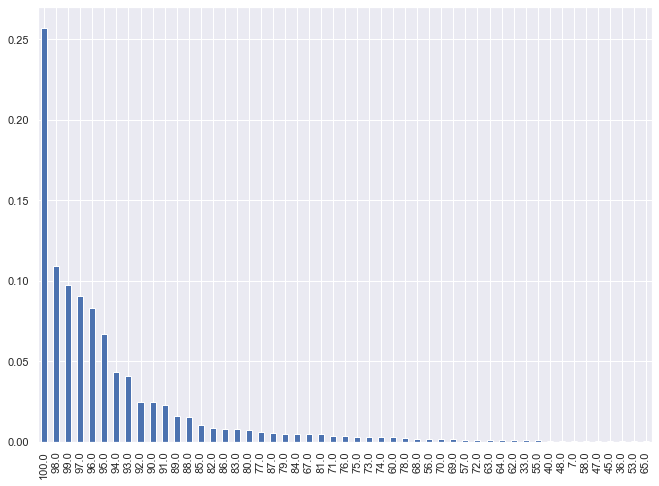

In [160]:
Dtrain['Rating'].value_counts(normalize=True).plot(kind='bar')


In [161]:
Dtrain.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [162]:
Dtrain.drop(['Place'],inplace=True,axis=1)

In [163]:
Dtrain.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [164]:
Dtrain['Qual_1'] = Dtrain['Qualification'].str.split(',').str[0]
Dtrain['Qual_2'] = Dtrain['Qualification'].str.split(',').str[1]
Dtrain['Qual_3'] = Dtrain['Qualification'].str.split(',').str[2]

In [165]:
Dtrain.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,Qual_1,Qual_2,Qual_3
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,BAMS,NaN,NaN


In [166]:
Dtrain['City'].fillna(Dtrain['City'].mode(),inplace = True)
Dtrain['Locality'].fillna(Dtrain['Locality'].mode,inplace = True)
Dtrain['Qualification'].fillna(Dtrain['Qualification'].mode(),inplace = True)
Dtrain['Profile'].fillna(Dtrain['Profile'].mode(),inplace = True)
Dtrain['Qual_1'].fillna(Dtrain['Qual_1'].mode(),inplace = True)
Dtrain['Qual_2'].fillna(Dtrain['Qual_2'].mode(),inplace = True)
Dtrain['Qual_3'].fillna(Dtrain['Qual_3'].mode(),inplace = True)

In [167]:
Dtrain.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,Qual_1,Qual_2,Qual_3
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,Venereology & Leprosy
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,BAMS,NaN,NaN


In [168]:
Dtrain['Misc1'] = Dtrain['Miscellaneous_Info'].str.split('%').str[0]




In [169]:
Dtrain['Misc2'] = Dtrain['Miscellaneous_Info'].str.split('% ').str[1]



In [170]:
Dtrain['Misc3'] = Dtrain['Misc2'].str.split(' ').str[0]

Dtrain['Misc3'].fillna(0,inplace = True)

In [171]:
Dtrain.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City,Qual_1,Qual_2,Qual_3,Misc1,Misc2,Misc3
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,Venereology & Leprosy,100,"16 Feedback Kakkanad, Ernakulam",16
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN,98,"76 Feedback Whitefield, Bangalore",76
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,0
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN,"Bannerghatta Road, Bangalore ₹250 Available on...",NaN,0
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,BAMS,NaN,NaN,100,"4 Feedback Keelkattalai, Chennai",4


In [172]:
Dtrain.drop(['Qualification'],inplace=True,axis=1)
Dtrain.drop(['Miscellaneous_Info'],inplace=True,axis=1)

In [173]:
Dtrain.head()

,Experience,Rating,Profile,Fees,Locality,City,Qual_1,Qual_2,Qual_3,Misc1,Misc2,Misc3
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,Venereology & Leprosy,100,"16 Feedback Kakkanad, Ernakulam",16
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN,98,"76 Feedback Whitefield, Bangalore",76
2,9,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,0
3,12,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN,"Bannerghatta Road, Bangalore ₹250 Available on...",NaN,0
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,BAMS,NaN,NaN,100,"4 Feedback Keelkattalai, Chennai",4


In [174]:
Dtrain.drop(['Misc1'],inplace=True,axis=1)
Dtrain.drop(['Misc2'],inplace=True,axis=1)
Dtrain.drop(['Misc3'],inplace=True,axis=1)

In [175]:
Dtrain.head()

,Experience,Rating,Profile,Fees,Locality,City,Qual_1,Qual_2,Qual_3
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,Venereology & Leprosy
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,9,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,12,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,BAMS,NaN,NaN


In [176]:
Dtrain.isnull().sum()

Experience       0
Rating        3302
Profile          0
Fees             0
Locality         0
City             1
Qual_1           0
Qual_2        1962
Qual_3        4589
dtype: int64

In [178]:
Dtrain['Qual_3'].value_counts()

 Venereology & Leprosy                                      186
 MBBS                                                       114
 DNB - ENT                                                   68
 MS - ENT                                                    35
 DNB - Dermatology & Venereology                             35
                                                           ... 
 FRACP (Rheumatology)                                         1
 MCh - Surgical Oncology                                      1
 Certificate Course of One Year in Dental Implants            1
 M Phil Psychology                                            1
 Post Graduate Certificate in Advanced Oral Implantology      1
Name: Qual_3, Length: 406, dtype: int64

In [180]:
Dtrain['Rating'].fillna(Dtrain['Rating'].mean(),inplace = True)

In [182]:
Dtrain.isnull().sum()

Experience       0
Rating           0
Profile          0
Fees             0
Locality         0
City             1
Qual_1           0
Qual_2        1962
Qual_3        4589
dtype: int64

In [183]:
Dtrain['Qual_1'].fillna("XXX",inplace = True)
Dtrain['Qual_2'].fillna("XXX",inplace = True)
Dtrain['Qual_3'].fillna("XXX",inplace = True)

In [185]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [191]:

Dtrain["Profile"] = le.fit_transform(Dtrain["Profile"])
Dtrain["Locality"] = le.fit_transform(Dtrain["Locality"])


In [192]:
Dtrain.drop(['City'],inplace=True,axis=1)

In [194]:
Dtrain.head()

,Experience,Rating,Profile,Fees,Locality,Qual_1,Qual_2,Qual_3
0,24,100.000000,5,100,297,BHMS,MD - Homeopathy,Venereology & Leprosy
1,12,98.000000,0,350,856,BAMS,MD - Ayurveda Medicine,XXX
2,9,94.643475,3,300,453,MBBS,MS - Otorhinolaryngology,XXX
3,12,94.643475,0,250,68,BSc - Zoology,BAMS,XXX
4,20,100.000000,0,250,336,BAMS,XXX,XXX


In [197]:

Dtrain["Qual_1"] = le.fit_transform(Dtrain["Qual_1"])
Dtrain["Qual_2"] = le.fit_transform(Dtrain["Qual_2"])
Dtrain["Qual_3"] = le.fit_transform(Dtrain["Qual_3"])

In [198]:
Dtrain.head()

,Experience,Rating,Profile,Fees,Locality,Qual_1,Qual_2,Qual_3
0,24,100.000000,5,100,297,8,252,401
1,12,98.000000,0,350,856,5,241,406
2,9,94.643475,3,300,453,79,334,406
3,12,94.643475,0,250,68,12,7,406
4,20,100.000000,0,250,336,5,426,406


In [201]:
Dtest.drop(['Place'],inplace=True,axis=1)
Dtest['Qual_1'] = Dtest['Qualification'].str.split(',').str[0]
Dtest['Qual_2'] = Dtest['Qualification'].str.split(',').str[1]
Dtest['Qual_3'] = Dtest['Qualification'].str.split(',').str[2]




In [202]:
Dtest.drop(['Qualification'],inplace=True,axis=1)
Dtest.drop(['Miscellaneous_Info'],inplace=True,axis=1)

Dtest['Qual_1'].fillna("XXX",inplace = True)
Dtest['Qual_2'].fillna("XXX",inplace = True)
Dtest['Qual_3'].fillna("XXX",inplace = True)

In [203]:
Dtest["Profile"] = le.fit_transform(Dtest["Profile"])
Dtest["Locality"] = le.fit_transform(Dtest["Locality"])


Dtest.drop(['City'],inplace=True,axis=1)

Dtest["Qual_1"] = le.fit_transform(Dtest["Qual_1"])
Dtest["Qual_2"] = le.fit_transform(Dtest["Qual_2"])
Dtest["Qual_3"] = le.fit_transform(Dtest["Qual_3"])

In [204]:
Dtest.head()

,Experience,Rating,Profile,Locality,Qual_1,Qual_2,Qual_3
0,35,NaN,4,142,48,243,195
1,31,NaN,3,577,48,79,195
2,40,70.0,2,212,48,28,195
3,0,NaN,0,373,1,243,195
4,16,100.0,1,231,2,157,195


In [206]:
Dtest['Rating'].fillna(Dtest['Rating'].mean(),inplace = True)

In [207]:
Dtest.head()

,Experience,Rating,Profile,Locality,Qual_1,Qual_2,Qual_3
0,35,94.441472,4,142,48,243,195
1,31,94.441472,3,577,48,79,195
2,40,70.000000,2,212,48,28,195
3,0,94.441472,0,373,1,243,195
4,16,100.000000,1,231,2,157,195


In [210]:
Dtrain.head()

,Experience,Rating,Profile,Fees,Locality,Qual_1,Qual_2,Qual_3
0,24,100.000000,5,100,297,8,252,401
1,12,98.000000,0,350,856,5,241,406
2,9,94.643475,3,300,453,79,334,406
3,12,94.643475,0,250,68,12,7,406
4,20,100.000000,0,250,336,5,426,406


In [212]:
X= Dtrain.drop(['Fees'],axis=1)
y=Dtrain['Fees']

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [215]:
from sklearn.ensemble import RandomForestRegressor
RGR = RandomForestRegressor()
RGR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [216]:
y_pred = RGR.predict(X_test)

In [217]:
RGR.score(X_train, y_train)

0.877619313348629

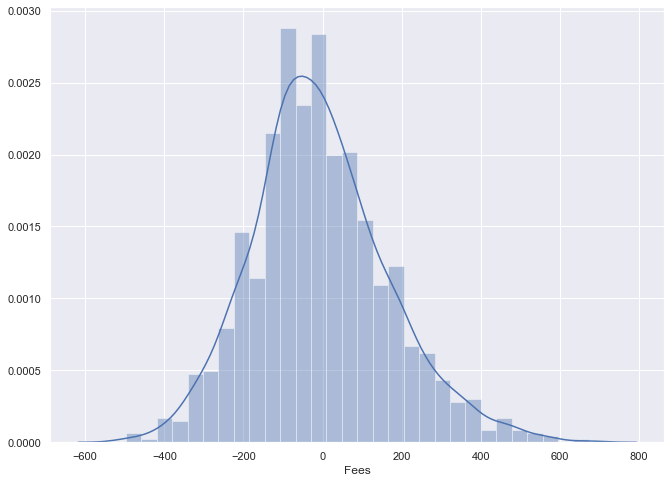

In [219]:
sns.distplot(y_test-y_pred)
plt.show()

In [222]:
from sklearn import metrics

In [223]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 133.43159614949641
MSE: 29306.618742385097
RMSE: 171.1917601474589


# Linear Regression

In [224]:
from sklearn.linear_model import LinearRegression

In [225]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
Y_Pred = reg.predict(X_test)
Y_Pred

array([240.13693702, 409.08511101, 338.14480326, ..., 237.76224046,
       189.13938134, 227.45708292])

In [227]:
mse = mean_squared_error(y_test, Y_Pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, Y_Pred))

RMSE : 177.1274042940591
Variance score: 0.09


# We will go with RandomForest Regressor as it gives us a better curve